Connect to Google Drive

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Resize the images

In [25]:
#move to images folder for resizing
%cd /content/gdrive/MyDrive/dataset/MyAnimation3/

/content/gdrive/MyDrive/dataset/MyAnimation3


resizing...
['frames2_01.png', 'frames2_02.png', 'frames2_03.png', 'frames2_04.png', 'frames2_05.png', 'frames2_06.png', 'frames2_07.png', 'frames2_08.png', 'frames2_09.png', 'frames2_10.png', 'frames2_11.png', 'frames2_12.png']
(12, 128, 128, 3)


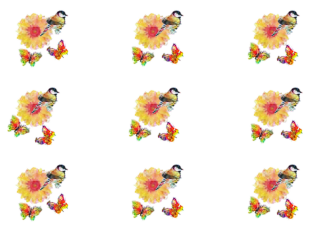

In [29]:
## image_resizer.py
# Importing required libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Defining an image size and image channel
# We are going to resize all our images to 128X128 size and since our images are colored images
# We are setting our image channels to 3 (RGB)

IMAGE_SIZE = 128
IMAGE_CHANNELS = 3
IMAGE_DIR = os.getcwd()

# Defining image dir path. Change this if you have different directory
images_path = IMAGE_DIR

training_data = []

# Iterating over the images inside the directory and resizing them using
# Pillow's resize method.
print('resizing...')
lst = sorted(os.listdir(images_path))
print(lst)

for filename in lst:
  #path = os.path.join(images_path, filename)
  image = Image.open(filename).resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
  image = image.convert("RGB")
  #image = image.convert("L")
  try:
    image = np.reshape(image, (IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))
    training_data.append(np.asarray(image))
  except ValueError as ve:
    print(ve)
    print("file '"+filename+"' is invalid")
  
training_data = np.reshape(training_data, (-1, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))
#training_data = training_data / 127.5 - 1 #normalize
training_data = training_data / 255 #normalize
print(training_data.shape)

#show example of resized
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.imshow(training_data[i])

In [30]:
#move to folder for save
%cd /content/gdrive/MyDrive/dataset/dataset_npy
print('saving file...')
np.save('MyAnimation4.npy', training_data)

/content/gdrive/MyDrive/dataset/dataset_npy
saving file...
